In [ ]:
pip install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
#Define o caminho para o dataset
DATA_PATH = r"dadosIntegradosAltitude-Clima-Solo-Agrotoxicos-Era5-semCidades-ComKmeans3.xlsx"

In [51]:
#Carrega o dataset

def load_main_data():
    # return pd.read_excel(io=DATA_PATH, sheet_name="raw_data")
    return pd.read_excel(io=DATA_PATH, sheet_name="Sheet1")
    
main_data = load_main_data()
#main_data

In [54]:
main_data.drop(columns=["Unnamed: 0"], inplace=True)

In [53]:
main_data.head()

,Unnamed: 0,rep,n_spray,sev,tipo_umidade_EN,distribuicao_umidade_EN,desc_completa_EN_P1,desc_completa_EN_P2,OH_desc_completa_Tropical,OH_desc_completa_Equatorial,...,PICO_DOSE_nrmlzd_Standart,TRIF_DOSE_nrmlzd_Standart,PROT_DOSE_nrmlzd_Standart,TEBU_DOSE_nrmlzd_Standart,PYRA_DOSE_nrmlzd_Standart,FLUX_DOSE_nrmlzd_Standart,BENZ_DOSE_nrmlzd_Standart,EPOX_DOSE_nrmlzd_Standart,BIXA_DOSE_nrmlzd_Standart,Cluster
0,0,1,3,71.5,0,4,0,0,1,0,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
1,1,2,3,67.2,0,4,0,0,1,0,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
2,2,3,3,66.0,0,4,0,0,1,0,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
3,3,4,3,64.0,0,4,0,0,1,0,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2
4,4,1,3,80.0,0,4,0,0,1,0,...,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017,2


In [ ]:
def convert_sev_to_float(data = main_data):
    # data["sev"] = data["sev"].astype(float)
    data["sev"] = pd.to_numeric(arg=data["sev"], errors="coerce")
    # data["sev"].dropna(inplace=True)
    data["sev"] = data["sev"].fillna(0)
convert_sev_to_float()

In [ ]:
pd.set_option('display.max_rows', 120)
main_data.dtypes

year                              int64
location                         object
state                            object
rep                               int64
n_spray                           int64
brand_name                       object
sev                             float64
brand_name_EN                     int64
RH_mean_mes_11                  float64
RH_sd_mes_11                    float64
RH_max_mes_11                   float64
RH_min_mes_11                   float64
RH_mean_mes_12                  float64
RH_sd_mes_12                    float64
RH_max_mes_12                   float64
RH_min_mes_12                   float64
pr_mean_mes_11                  float64
pr_sd_mes_11                    float64
pr_max_mes_11                   float64
pr_min_mes_11                   float64
pr_sum_mes_11                   float64
pr_mean_mes_12                  float64
pr_sd_mes_12                    float64
pr_max_mes_12                   float64
pr_min_mes_12                   float64


In [ ]:
pd.set_option('display.max_rows', 900)
main_data.columns

Index(['year', 'location', 'state', 'rep', 'n_spray', 'brand_name', 'sev',
       'brand_name_EN', 'RH_mean_mes_11', 'RH_sd_mes_11',
       ...
       'CYPR_DOSE_nrmlzd_Standart', 'PICO_DOSE_nrmlzd_Standart',
       'TRIF_DOSE_nrmlzd_Standart', 'PROT_DOSE_nrmlzd_Standart',
       'TEBU_DOSE_nrmlzd_Standart', 'PYRA_DOSE_nrmlzd_Standart',
       'FLUX_DOSE_nrmlzd_Standart', 'BENZ_DOSE_nrmlzd_Standart',
       'EPOX_DOSE_nrmlzd_Standart', 'BIXA_DOSE_nrmlzd_Standart'],
      dtype='object', length=117)

In [ ]:
import os

dir_path = os.getcwd()
for filename in os.listdir(dir_path):
    if filename.startswith("grafico_dados_limpos_"):
        os.remove(os.path.join(dir_path, filename))
    if filename.startswith("resultados_erros_por"):
       os.remove(os.path.join(dir_path, filename))

In [55]:
df1 = main_data.copy()

In [ ]:
df1 = df1[~df1['location'].isin(['CAMPO VERDE', 'PRIMAVERA DO LESTE', 'CHAPADÃO DO SUL', 'LUÍS EDUARDO MAGALHÃES'])]

In [56]:
df1.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)
#df1 = df1[main_data['location'] == 'CAMPO VERDE']
#df1.shape[0]

KeyError: ignored

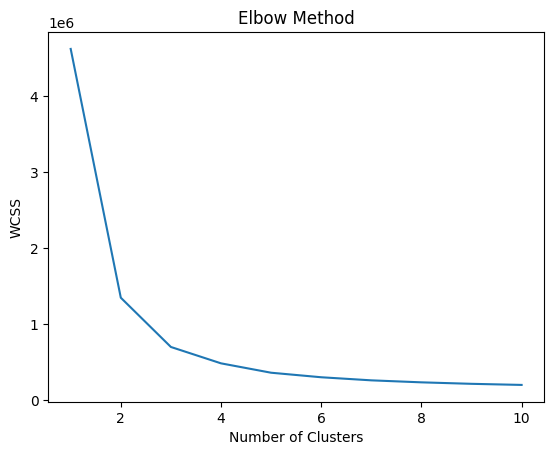

[2 2 2 ... 1 1 1]


In [49]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = df1

# Select features to use for clustering
X = data.values  # Replace with actual column names

# Find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Fit k-means clustering algorithm to the data
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

# Visualize the results
data["Cluster"] = y_kmeans
data.to_excel("dadosIntegradosAltitude-Clima-Solo-Agrotoxicos-Era5-semCidades-ComKmeans3.xlsx")
#sns.pairplot(data, hue="Cluster")
#lt.show()



In [ ]:
df1

,year,location,state,rep,n_spray,brand_name,sev,brand_name_EN,RH_mean_mes_11,RH_sd_mes_11,...,CYPR_DOSE_nrmlzd_Standart,PICO_DOSE_nrmlzd_Standart,TRIF_DOSE_nrmlzd_Standart,PROT_DOSE_nrmlzd_Standart,TEBU_DOSE_nrmlzd_Standart,PYRA_DOSE_nrmlzd_Standart,FLUX_DOSE_nrmlzd_Standart,BENZ_DOSE_nrmlzd_Standart,EPOX_DOSE_nrmlzd_Standart,BIXA_DOSE_nrmlzd_Standart
0,2015,CAMPO VERDE,MT,1,3,Alto 100,71.5,0,-0.458631,1.500566,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
1,2015,CAMPO VERDE,MT,2,3,Alto 100,67.2,0,-0.458631,1.500566,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
2,2015,CAMPO VERDE,MT,3,3,Alto 100,66.0,0,-0.458631,1.500566,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
3,2015,CAMPO VERDE,MT,4,3,Alto 100,64.0,0,-0.458631,1.500566,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
4,2015,CAMPO VERDE,MT,1,3,Alto 100,80.0,0,-0.458631,1.500566,...,3.680655,-0.563623,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,-0.390897,-0.249017,-0.249017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,2019,EREBANGO,RS,4,4,Vessarya,71.5,25,-0.458817,-1.003793,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3871,2019,SÃO MIGUEL DO PASSA QUATRO,GO,1,4,Vessarya,25.8,25,-0.458908,-0.752673,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3872,2019,SÃO MIGUEL DO PASSA QUATRO,GO,2,4,Vessarya,24.8,25,-0.458908,-0.752673,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017
3873,2019,SÃO MIGUEL DO PASSA QUATRO,GO,3,4,Vessarya,25.8,25,-0.458908,-0.752673,...,-0.491508,1.774235,-0.534281,-0.416638,-0.385554,-0.375146,-0.38364,2.558218,-0.249017,-0.249017


In [ ]:
df1.to_excel('analise_dados_sem_normalizar_sem_cidades.xlsx', index=False)

In [ ]:
df1['sev'].values

array([70. , 60. , 70. , 65. , 55. , 60. , 65. , 60. , 60. , 40. , 25. ,
       30. , 30. , 20. , 25. , 23. , 25. , 25. , 20. , 15. , 20. , 17. ,
       10. , 12. , 10. , 11. , 15. , 25. , 20. , 35. , 20. , 27. , 77. ,
       70. , 68. , 70. , 65. , 60. , 70. , 60. , 70. , 11. , 12. , 18. ,
       12. ,  1. ,  1.5,  1. ,  1.5,  2. ,  5. ,  5. ,  5. ,  5. ,  4.5,
       30. , 20. , 25. , 18. , 12. , 15. , 20. , 13. , 25. ,  8. ,  9. ,
       10. ,  8. ,  8. , 30. , 22. , 25. , 25. , 27. , 20. , 40. , 32. ,
       30. , 70. , 60. , 70. , 65. , 75. , 80. , 65. , 70. , 70. , 60. ,
       45. , 55. , 55. , 40. , 30. , 45. , 30. , 25. , 82. , 77. , 80. ,
       80. , 90. , 87. , 95. , 92. , 85. , 45. , 50. , 50. , 50. , 50. ,
       12. , 10. , 12. , 10. , 12. , 10. ,  7. , 12. ,  8. ,  7.5, 20. ,
       18. , 40. , 35. , 30. , 10. ,  9. , 12. , 10. , 15. ,  2. ,  1. ,
        1.5,  1. ,  1. ,  4. ,  3. ,  3. ,  4. ,  3. , 23. , 20. , 30. ,
       25. , 25. , 12. ,  8. , 12. , 13. , 15. ])

In [ ]:
df1.shape[0]

2599

In [ ]:
print(f"Média das severidades: {np.mean(df1['sev'].values)}")
print(f"Varância das severidades: {np.var(df1['sev'].values)}")
print(f"Desvio padrão das severidades: {np.std(df1['sev'].values)}")

Média das severidades: 35.911950750288575
Varância das severidades: 615.8815884608296
Desvio padrão das severidades: 24.81696170889639


<Axes: title={'center': 'Observando frequência da severidade para todo o conjunto'}, xlabel='sev', ylabel='Frequency'>

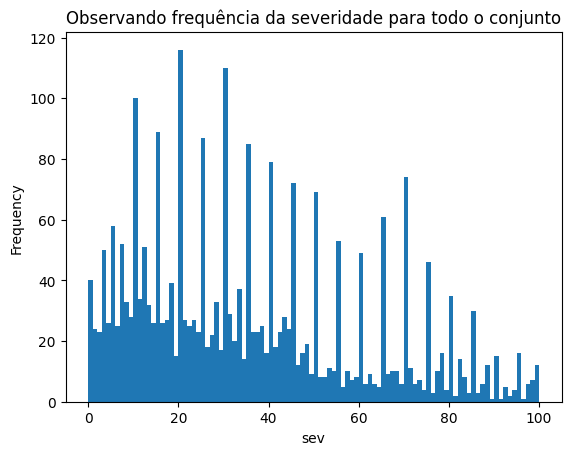

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.title(f'Observando frequência da severidade para todo o conjunto')
plt.xlabel('sev')
plt.ylabel('frequency')

df1['sev'].plot(kind = 'hist', bins=100)

In [ ]:
df1.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)
df1 = df1[main_data['year'] == 2015]
df1

,rep,n_spray,sev,brand_name_EN,CHECK,DMI,MBC,SDHI,QOI,COP,DIT,lat_nrmlzd_Standart,long_nrmlzd_Standart
0,1,3,71.5,0,0,1,0,0,0,0,0,0.708555,-0.722752
1,2,3,67.2,0,0,1,0,0,0,0,0,0.708555,-0.722752
2,3,3,66.0,0,0,1,0,0,0,0,0,0.708555,-0.722752
3,4,3,64.0,0,0,1,0,0,0,0,0,0.708555,-0.722752
4,1,3,42.1,1,0,1,0,0,1,0,0,0.708555,-0.722752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,4,3,55.0,13,0,1,0,0,1,0,0,-0.142448,-0.527246
5785,1,3,80.0,14,1,0,0,0,0,0,0,-0.142448,-0.527246
5786,2,3,82.0,14,1,0,0,0,0,0,0,-0.142448,-0.527246
5787,3,3,76.0,14,1,0,0,0,0,0,0,-0.142448,-0.527246


Com as colunas: ['rep', 'n_spray', 'sev', 'brand_name_EN', 'RH_mean_mes_11', 'RH_sd_mes_11', 'RH_max_mes_11', 'RH_min_mes_11', 'RH_mean_mes_12', 'RH_sd_mes_12', 'RH_max_mes_12', 'RH_min_mes_12', 'pr_mean_mes_11', 'pr_sd_mes_11', 'pr_max_mes_11', 'pr_min_mes_11', 'pr_sum_mes_11', 'pr_mean_mes_12', 'pr_sd_mes_12', 'pr_max_mes_12', 'pr_min_mes_12', 'pr_sum_mes_12', 'ETo_mean_mes_11', 'ETo_sd_mes_11', 'ETo_max_mes_11', 'ETo_min_mes_11', 'ETo_sum_mes_11', 'ETo_mean_mes_12', 'ETo_sd_mes_12', 'ETo_max_mes_12', 'ETo_min_mes_12', 'ETo_sum_mes_12', 'Rs_max_mes_11', 'Rs_min_mes_11', 'Rs_mean_mes_11', 'Rs_sd_mes_11', 'Rs_max_mes_12', 'Rs_min_mes_12', 'Rs_mean_mes_12', 'Rs_sd_mes_12', 'u2_min_mes_11', 'u2_mean_mes_11', 'u2_sd_mes_11', 'u2_max_mes_11', 'u2_min_mes_12', 'u2_mean_mes_12', 'u2_sd_mes_12', 'u2_max_mes_12', 'Tmax_sd_mes_11', 'Tmax_mean_mes_11', 'Tmax_max_mes_11', 'Tmax_min_mes_11', 'Tmax_sd_mes_12', 'Tmax_mean_mes_12', 'Tmax_max_mes_12', 'Tmax_min_mes_12', 'Tmin_sd_mes_11', 'Tmin_min_mes

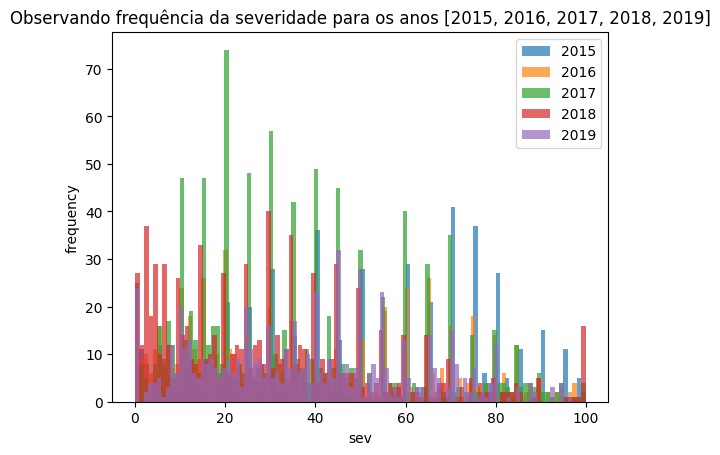

In [ ]:
#Faz a análise dos dados separando por anos

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_seq_items = None

years = [2015, 2016, 2017, 2018, 2019]
lin_reg = RandomForestRegressor()
output_file = open("resultados_erros_por_ano.txt", "w")
output_file.write(f"Colunas usadas{df1.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", df1.columns.tolist())
for y in years:
  df = main_data.copy()
  df = df[main_data['year'] == y]
  df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para ano = ", y)
  output_file.write(f"Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}, para ano = {y}\n")
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para o ano {y}')
  #plt.xlabel('sev')
  #plt.ylabel('frequency')

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'grafico_dados_limpos_ano_{y}.png')
  
  
  plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

plt.title('Observando frequência da severidade para os anos ' + str(years))
plt.xlabel('sev')
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()
output_file.close()

Com as colunas: Index(['rep', 'n_spray', 'sev', 'brand_name_EN', 'RH_mean_mes_11',
       'RH_sd_mes_11', 'RH_max_mes_11', 'RH_min_mes_11', 'RH_mean_mes_12',
       'RH_sd_mes_12', 'RH_max_mes_12', 'RH_min_mes_12', 'pr_mean_mes_11',
       'pr_sd_mes_11', 'pr_max_mes_11', 'pr_min_mes_11', 'pr_sum_mes_11',
       'pr_mean_mes_12', 'pr_sd_mes_12', 'pr_max_mes_12', 'pr_min_mes_12',
       'pr_sum_mes_12', 'ETo_mean_mes_11', 'ETo_sd_mes_11', 'ETo_max_mes_11',
       'ETo_min_mes_11', 'ETo_sum_mes_11', 'ETo_mean_mes_12', 'ETo_sd_mes_12',
       'ETo_max_mes_12', 'ETo_min_mes_12', 'ETo_sum_mes_12', 'Rs_max_mes_11',
       'Rs_min_mes_11', 'Rs_mean_mes_11', 'Rs_sd_mes_11', 'Rs_max_mes_12',
       'Rs_min_mes_12', 'Rs_mean_mes_12', 'Rs_sd_mes_12', 'u2_min_mes_11',
       'u2_mean_mes_11', 'u2_sd_mes_11', 'u2_max_mes_11', 'u2_min_mes_12',
       'u2_mean_mes_12', 'u2_sd_mes_12', 'u2_max_mes_12', 'Tmax_sd_mes_11',
       'Tmax_mean_mes_11', 'Tmax_max_mes_11', 'Tmax_min_mes_11',
       'Tmax_sd_m

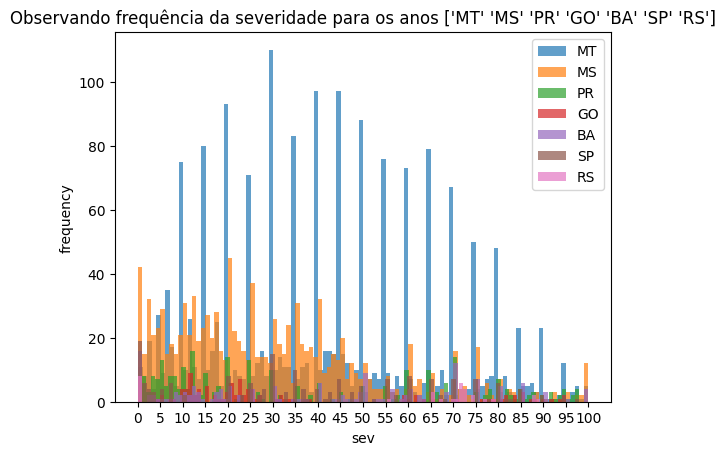

In [ ]:
#Faz a análise dos dados separando por estados

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt

years = main_data['state'].unique()
lin_reg = RandomForestRegressor()
output_file = open("resultados_erros_por_estado.txt", "w")
output_file.write(f"Colunas usadas{df.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", df.columns)
for y in years:
  df = main_data.copy()
  df = df[main_data['state'] == y]
  df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para estado = ", y)
  output_file.write(f"Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}, para estado = {y}\n")
  
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para o estado {y}')
  #plt.xlabel('sev')
  #plt.xticks(range(0, 101, 5))
  #plt.ylabel('frequency')
  

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'grafico_dados_limpos_estado_{y}.png')
  
  
  plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

plt.title('Observando frequência da severidade para os anos ' + str(years))
plt.xlabel('sev')
plt.xticks(range(0, 101, 5))
plt.ylabel('frequency')
plt.legend(loc='upper right')
plt.show()
output_file.close()

In [57]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor


desvios = []
years = main_data['Cluster'].unique()
lin_reg = CatBoostRegressor(verbose=False)
output_file = open("./resultados_erros_por_cluster_catboost_sem_cidades_semSolo_kmeans3.txt", "w")
output_file.write(f"Colunas usadas{df1.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", df1.columns)
for y in years:
  df = df1.copy()
  df = df[main_data['Cluster'] == y]
  #df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para cidade = ", y)
  output_file.write(f"{y}:\n")
  output_file.write(f"  Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}\n")
  output_file.write(f"  Número de linhas: {df.shape[0]}\n")
  output_file.write(f"  Média das severidades: {np.mean(df['sev'].values)}\n")
  output_file.write(f"  Varância das severidades: {np.var(df['sev'].values)}\n")
  output_file.write(f"  Desvio padrão das severidades: {np.std(df['sev'].values)}\n\n")
  desvios.append(np.std(df['sev'].values))
  #plt.clf()
  #plt.title(f'Observando frequência da severidade para a cidades {y}')
  #plt.xlabel('sev')
  #plt.xticks(range(0, 101, 5))
  #plt.ylabel('frequency')
  

  #df['sev'].plot(kind = 'hist', bins=100)
  #plt.savefig(f'./drive/MyDrive/temp/dataset modificado/por cidade/grafico_dados_modificados_cidade_{y}.png')
  
  
  #plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

#plt.title('Observando frequência da severidade para as cidades ' + str(years))
#plt.xlabel('sev')
#plt.xticks(range(0, 101, 5))
#plt.ylabel('frequency')
#plt.legend(loc='upper right')
#plt.show()
output_file.write(f"Média dos desvios = {np.mean(desvios)} e desvio padrão dos desvios = {np.std(desvios)}")
output_file.close()

Com as colunas: Index(['rep', 'n_spray', 'sev', 'tipo_umidade_EN', 'distribuicao_umidade_EN',
       'desc_completa_EN_P1', 'desc_completa_EN_P2',
       'OH_desc_completa_Tropical', 'OH_desc_completa_Equatorial',
       'OH_desc_completa_Temperado', 'OH_desc_completa_Quente',
       'OH_desc_completa_Subquente', 'OH_desc_completa_Mesotermico', 'OH_AZOX',
       'OH_CYPR', 'OH_PICO', 'OH_TRIF', 'OH_PROT', 'OH_TEBU', 'OH_PYRA',
       'OH_FLUX', 'OH_BENZ', 'OH_EPOX', 'OH_BIXA', 'CHECK', 'DMI', 'MBC',
       'SDHI', 'QOI', 'COP', 'DIT', 'lat_nrmlzd_Standart',
       'long_nrmlzd_Standart', 'altitude_nrmlzd_Standart',
       'AZOX_DOSE_nrmlzd_Standart', 'CYPR_DOSE_nrmlzd_Standart',
       'PICO_DOSE_nrmlzd_Standart', 'TRIF_DOSE_nrmlzd_Standart',
       'PROT_DOSE_nrmlzd_Standart', 'TEBU_DOSE_nrmlzd_Standart',
       'PYRA_DOSE_nrmlzd_Standart', 'FLUX_DOSE_nrmlzd_Standart',
       'BENZ_DOSE_nrmlzd_Standart', 'EPOX_DOSE_nrmlzd_Standart',
       'BIXA_DOSE_nrmlzd_Standart', 'Cluster'],
    

In [ ]:
#Faz a análise dos dados separando por cidades

import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

years = main_data['brand_name'].unique()
lin_reg = RandomForestRegressor()
output_file = open("./drive/MyDrive/temp/dataset modificado/por produto/resultados_erros_por_produto.txt", "w")
output_file.write(f"Colunas usadas{df1.columns}\n")

def split_train_test(data, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

print("Com as colunas:", df.columns)
for y in years:
  df = main_data.copy()
  df = df[main_data['brand_name'] == y]
  df.drop(columns=['year', 'location', 'state', 'brand_name'], inplace=True)

  train_set, test_set = split_train_test(df)
  lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])

  sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
  lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
  lin_rmse1 = np.sqrt(lin_mse1)
  sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
  lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
  lin_rmse2 = np.sqrt(lin_mse2)

  print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2, ", para produto = ", y)
  output_file.write(f"Erro no set de treino: {lin_rmse1}, Erro no set de teste: {lin_rmse2}, para produto = {y}\n")
  plt.clf()
  plt.title(f'Observando frequência da severidade para produto {y}')
  plt.xlabel('sev')
  plt.xticks(range(0, 101, 5))
  plt.ylabel('frequency')
  

  df['sev'].plot(kind = 'hist', bins=100)
  plt.savefig('./drive/MyDrive/temp/dataset modificado/por produto/grafico_dados_modificados_produto_' + (y.replace('/',"-") if '/' in y else y) + '.png')
  
  
  #plt.hist(df['sev'], bins=100, alpha=0.7, label=str(y))

#plt.title('Observando frequência da severidade para as cidades ' + str(years))
#plt.xlabel('sev')
#plt.xticks(range(0, 101, 5))
#plt.ylabel('frequency')
#plt.legend(loc='upper right')
#plt.show()
output_file.close()

FileNotFoundError: ignored

In [58]:
def split_train_test(data=df1, test_ratio=.2):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test()

In [59]:
#Teste dos dados com random forest

#import sklearn
from sklearn.tree import ExtraTreeRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm

from sklearn.metrics import mean_squared_error

#lin_reg = linear_model.LinearRegression()
#lin_reg = DecisionTreeRegressor()
lin_reg = RandomForestRegressor()
#lin_reg = KernelRidge(alpha=1.0)
#lin_reg = linear_model.Ridge(alpha=.5)
#lin_reg = linear_model.BayesianRidge()
#lin_reg = ExtraTreeRegressor()

lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])


sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)

Erro no set de treino: 4.771904386590064 , Erro no set de teste:  7.898966890102398


In [ ]:
pip install --upgrade xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.8 MB/s eta 0:00:00


In [60]:
#Teste dos dados com catboost e xgboost

#import sklearn
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


lin_reg = CatBoostRegressor(verbose=False)
#lin_reg = XGBRegressor()


lin_reg.fit(train_set.drop("sev", axis=1), train_set["sev"])


sev_predictions1 = lin_reg.predict(train_set.drop("sev", axis=1))
lin_mse1 = mean_squared_error(train_set["sev"], sev_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
sev_predictions2 = lin_reg.predict(test_set.drop("sev", axis=1))
lin_mse2 = mean_squared_error(test_set["sev"], sev_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("Erro no set de treino:", lin_rmse1, ", Erro no set de teste: ", lin_rmse2)

Erro no set de treino: 5.827811188024919 , Erro no set de teste:  6.8769953436821964


In [ ]:
import graphviz
output_folder = "./drive/MyDrive/temp/arvoresT"
os.makedirs(output_folder, exist_ok=True)

# Salve as visualizações das árvores
for tree_idx in range(lin_reg.tree_count_):
    tree_viz = lin_reg.plot_tree(tree_idx, pool=train_set.drop("sev", axis=1))
    output_path = os.path.join(output_folder, f"arvore_{tree_idx}.pdf")
    tree_viz.format = "png"  # Set the output format to PNG
    tree_viz.view(output_path)  # Save the visual image

print("Visualizações das árvores salvas na pasta 'arvores'.")

Visualizações das árvores salvas na pasta 'arvores'.


In [ ]:
df = df[df['CHECK'] == 0]

<Axes: title={'center': 'Observando frequência da severidade para CHECK = 0'}, xlabel='sev', ylabel='Frequency'>

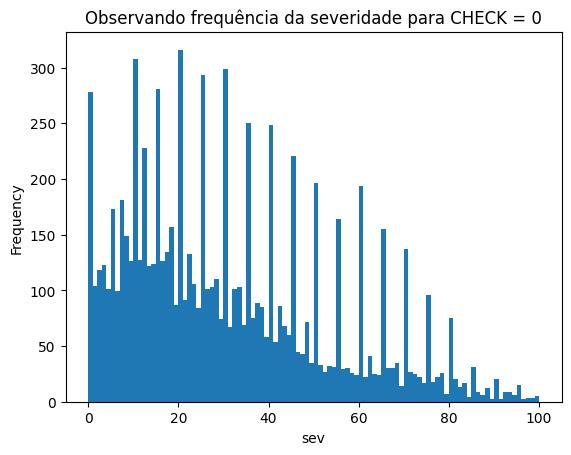

In [ ]:
import pandas.plotting
import pandas as pd
import matplotlib.pyplot as plt

plt.title('Observando frequência da severidade para CHECK = 0')
plt.xlabel('sev')
plt.ylabel('frequency')

df['sev'].plot(kind = 'hist', bins=100)

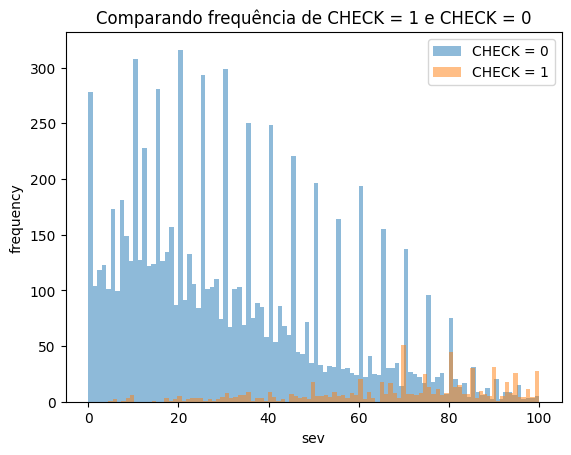

In [ ]:
df_check0 = df[df['CHECK'] == 0]
df_check1 = df[df['CHECK'] == 1]

plt.hist(df_check0['sev'], bins=100, alpha=0.5, label='CHECK = 0', density=True)
plt.hist(df_check1['sev'], bins=100, alpha=0.5, label='CHECK = 1', density=True)

plt.xlabel('sev')
plt.ylabel('frequency')
plt.title('Comparando frequência de CHECK = 1 e CHECK = 0')

plt.legend()

plt.show()







